In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

In [2]:
pwd

'/Users/amudide/zoonomia/Final-Revisions'

# Global

In [3]:
'''

Given a dataset and a name, segregate the non-DD and DD species into two files

'''

def split(df, name):
    
    ndf = df[df['iucn'] != 'DD']
    ddf = df[df['iucn'] == 'DD']
    
    ndf.to_csv('data/' + name + '.csv')
    ddf.to_csv('dd-data/' + name + '-dd' + '.csv')

# Analysis

In [4]:
df = pd.read_csv("raw-data/zoonomia_dataset_17nov2021_streamlined.csv", index_col = 'Sp')

In [5]:
df

,Order,Family,IUCN,threatened,wild_status_ref,wild_status_reseq,diet_hoc,meanGQ,meanDP,Source,...,froh,ppn_conserved,phylop_kurtosis,ppn_miss_conserved,het_miss_impc_L,het_miss_impc_V,het_lof_impc_L,het_lof_impc_V,hom_miss_impc_L,hom_miss_impc_V
Sp,,,,,,,,,,,,,,,,,,,,,
Acinonyx_jubatus,CARNIVORA,Felidae,VU,1.0,wild,wild,Carnivore,48.557864,5.734421,2. Existing assembly,...,0.868654,0.033622,23.531877,0.131824,NaN,NaN,NaN,NaN,0.308549,0.378047
Acomys_cahirinus,RODENTIA,Muridae,LC,0.0,captive,captive,Omnivore,74.006180,28.037083,1. Zoonomia,...,0.957857,0.036393,20.859896,0.069992,NaN,NaN,NaN,NaN,0.237946,0.315492
Ailuropoda_melanoleuca,CARNIVORA,Ursidae,VU,1.0,captive,captive,Omnivore,91.852011,15.341954,2. Existing assembly,...,0.337415,0.029873,22.839135,0.087625,0.323529,0.296296,0.000000,0.000000,0.254025,0.348917
Ailurus_fulgens,CARNIVORA,Ailuridae,EN,1.0,wild,wild,Omnivore,NaN,NaN,2. Existing assembly,...,NaN,0.022421,26.727905,0.062419,NaN,NaN,NaN,NaN,0.223638,0.318392
Allactaga_bullata,RODENTIA,Dipodidae,LC,0.0,wild,wild,Omnivore,96.613555,24.537520,1. Zoonomia,...,0.027534,0.037799,22.285147,0.066352,0.273006,0.317007,0.000000,0.004082,0.224128,0.293176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vulpes_lagopus,CARNIVORA,Canidae,LC,0.0,captive,captive,Carnivore,93.447795,22.669996,1. Zoonomia,...,0.482580,0.024222,28.676295,0.054605,0.252000,0.309562,0.000000,0.003241,0.194462,0.286502
Xerus_inauris,RODENTIA,Sciuridae,LC,0.0,wild,wild,Omnivore,81.999646,18.393889,1. Zoonomia,...,0.361681,0.029061,23.128070,0.062846,0.353175,0.326625,0.000000,0.000000,0.222449,0.299498
Zalophus_californianus,CARNIVORA,Otariidae,LC,0.0,wild,wild,Carnivore,97.741809,62.983619,1. Zoonomia,...,0.381731,0.028800,25.108636,0.077842,0.307692,0.388186,0.018100,0.002110,0.234710,0.325076


In [6]:
df.columns

Index(['Order', 'Family', 'IUCN', 'threatened', 'wild_status_ref',
       'wild_status_reseq', 'diet_hoc', 'meanGQ', 'meanDP', 'Source',
       'Species', 'harm_mean_wt2', 'gw_het_mean', 'outbred_het_mode', 'froh',
       'ppn_conserved', 'phylop_kurtosis', 'ppn_miss_conserved',
       'het_miss_impc_L', 'het_miss_impc_V', 'het_lof_impc_L',
       'het_lof_impc_V', 'hom_miss_impc_L', 'hom_miss_impc_V'],
      dtype='object')

In [7]:
col = ['harm_mean_wt2', 'gw_het_mean', 'outbred_het_mode', 'froh',
       'ppn_conserved', 'phylop_kurtosis', 'ppn_miss_conserved',
       'het_miss_impc_L', 'het_miss_impc_V', 'het_lof_impc_L',
       'het_lof_impc_V', 'hom_miss_impc_L', 'hom_miss_impc_V', 'IUCN']

In [8]:
df = df[col]

In [9]:
df

,harm_mean_wt2,gw_het_mean,outbred_het_mode,froh,ppn_conserved,phylop_kurtosis,ppn_miss_conserved,het_miss_impc_L,het_miss_impc_V,het_lof_impc_L,het_lof_impc_V,hom_miss_impc_L,hom_miss_impc_V,IUCN
Sp,,,,,,,,,,,,,,
Acinonyx_jubatus,0.077523,0.000335,0.00055,0.868654,0.033622,23.531877,0.131824,NaN,NaN,NaN,NaN,0.308549,0.378047,VU
Acomys_cahirinus,2.539580,0.000121,0.00040,0.957857,0.036393,20.859896,0.069992,NaN,NaN,NaN,NaN,0.237946,0.315492,LC
Ailuropoda_melanoleuca,1.175983,0.004487,0.00100,0.337415,0.029873,22.839135,0.087625,0.323529,0.296296,0.000000,0.000000,0.254025,0.348917,VU
Ailurus_fulgens,1.865817,NaN,NaN,NaN,0.022421,26.727905,0.062419,NaN,NaN,NaN,NaN,0.223638,0.318392,EN
Allactaga_bullata,9.875471,0.002998,0.00280,0.027534,0.037799,22.285147,0.066352,0.273006,0.317007,0.000000,0.004082,0.224128,0.293176,LC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vulpes_lagopus,3.682468,0.001478,0.00210,0.482580,0.024222,28.676295,0.054605,0.252000,0.309562,0.000000,0.003241,0.194462,0.286502,LC
Xerus_inauris,4.077529,0.001585,0.00060,0.361681,0.029061,23.128070,0.062846,0.353175,0.326625,0.000000,0.000000,0.222449,0.299498,LC
Zalophus_californianus,0.579708,0.000914,0.00060,0.381731,0.028800,25.108636,0.077842,0.307692,0.388186,0.018100,0.002110,0.234710,0.325076,LC


In [10]:
df.index.tolist()

['Acinonyx_jubatus',
 'Acomys_cahirinus',
 'Ailuropoda_melanoleuca',
 'Ailurus_fulgens',
 'Allactaga_bullata',
 'Alouatta_palliata',
 'Ammotragus_lervia',
 'Anoura_caudifer',
 'Antilocapra_americana',
 'Aotus_nancymaae',
 'Aplodontia_rufa',
 'Artibeus_jamaicensis',
 'Ateles_geoffroyi',
 'Balaenoptera_acutorostrata',
 'Balaenoptera_bonaerensis',
 'Beatragus_hunteri',
 'Bison_bison',
 'Bos_indicus',
 'Bos_mutus',
 'Bos_taurus',
 'Bubalus_bubalis',
 'Callicebus_donacophilus',
 'Callithrix_jacchus',
 'Camelus_bactrianus',
 'Camelus_dromedarius',
 'Camelus_ferus',
 'Canis_lupus',
 'Canis_lupus_familiaris',
 'Capra_aegagrus',
 'Capra_hircus',
 'Capromys_pilorides',
 'Carollia_perspicillata',
 'Castor_canadensis',
 'Catagonus_wagneri',
 'Cavia_aperea',
 'Cavia_porcellus',
 'Cavia_tschudii',
 'Cebus_albifrons',
 'Cebus_capucinus',
 'Ceratotherium_simum',
 'Ceratotherium_simum_cottoni',
 'Cercocebus_atys',
 'Cercopithecus_neglectus',
 'Chaetophractus_vellerosus',
 'Cheirogaleus_medius',
 'Chinc

In [11]:
df = df.rename(columns={"IUCN": "iucn"})

In [12]:
df

,harm_mean_wt2,gw_het_mean,outbred_het_mode,froh,ppn_conserved,phylop_kurtosis,ppn_miss_conserved,het_miss_impc_L,het_miss_impc_V,het_lof_impc_L,het_lof_impc_V,hom_miss_impc_L,hom_miss_impc_V,iucn
Sp,,,,,,,,,,,,,,
Acinonyx_jubatus,0.077523,0.000335,0.00055,0.868654,0.033622,23.531877,0.131824,NaN,NaN,NaN,NaN,0.308549,0.378047,VU
Acomys_cahirinus,2.539580,0.000121,0.00040,0.957857,0.036393,20.859896,0.069992,NaN,NaN,NaN,NaN,0.237946,0.315492,LC
Ailuropoda_melanoleuca,1.175983,0.004487,0.00100,0.337415,0.029873,22.839135,0.087625,0.323529,0.296296,0.000000,0.000000,0.254025,0.348917,VU
Ailurus_fulgens,1.865817,NaN,NaN,NaN,0.022421,26.727905,0.062419,NaN,NaN,NaN,NaN,0.223638,0.318392,EN
Allactaga_bullata,9.875471,0.002998,0.00280,0.027534,0.037799,22.285147,0.066352,0.273006,0.317007,0.000000,0.004082,0.224128,0.293176,LC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vulpes_lagopus,3.682468,0.001478,0.00210,0.482580,0.024222,28.676295,0.054605,0.252000,0.309562,0.000000,0.003241,0.194462,0.286502,LC
Xerus_inauris,4.077529,0.001585,0.00060,0.361681,0.029061,23.128070,0.062846,0.353175,0.326625,0.000000,0.000000,0.222449,0.299498,LC
Zalophus_californianus,0.579708,0.000914,0.00060,0.381731,0.028800,25.108636,0.077842,0.307692,0.388186,0.018100,0.002110,0.234710,0.325076,LC


In [13]:
nans = df.isnull().sum(axis=1).tolist()

In [14]:
sum(df['iucn'].isna())

0

In [16]:
len(nans)

241

In [17]:
nans.index(11)

103

In [18]:
df.iloc[[103]]

,harm_mean_wt2,gw_het_mean,outbred_het_mode,froh,ppn_conserved,phylop_kurtosis,ppn_miss_conserved,het_miss_impc_L,het_miss_impc_V,het_lof_impc_L,het_lof_impc_V,hom_miss_impc_L,hom_miss_impc_V,iucn
Sp,,,,,,,,,,,,,,
Homo_sapiens,NaN,NaN,NaN,NaN,0.034714,21.859278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC


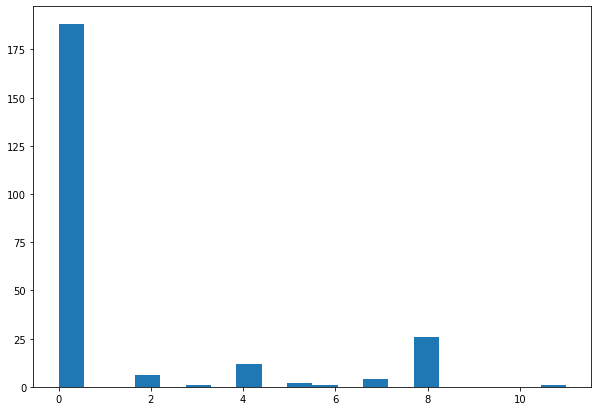

In [19]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(nans, bins = 20)
 
# Show plot
plt.show()

In [20]:
df = df.loc[[k < 11 for k in nans]]

In [21]:
df

,harm_mean_wt2,gw_het_mean,outbred_het_mode,froh,ppn_conserved,phylop_kurtosis,ppn_miss_conserved,het_miss_impc_L,het_miss_impc_V,het_lof_impc_L,het_lof_impc_V,hom_miss_impc_L,hom_miss_impc_V,iucn
Sp,,,,,,,,,,,,,,
Acinonyx_jubatus,0.077523,0.000335,0.00055,0.868654,0.033622,23.531877,0.131824,NaN,NaN,NaN,NaN,0.308549,0.378047,VU
Acomys_cahirinus,2.539580,0.000121,0.00040,0.957857,0.036393,20.859896,0.069992,NaN,NaN,NaN,NaN,0.237946,0.315492,LC
Ailuropoda_melanoleuca,1.175983,0.004487,0.00100,0.337415,0.029873,22.839135,0.087625,0.323529,0.296296,0.000000,0.000000,0.254025,0.348917,VU
Ailurus_fulgens,1.865817,NaN,NaN,NaN,0.022421,26.727905,0.062419,NaN,NaN,NaN,NaN,0.223638,0.318392,EN
Allactaga_bullata,9.875471,0.002998,0.00280,0.027534,0.037799,22.285147,0.066352,0.273006,0.317007,0.000000,0.004082,0.224128,0.293176,LC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vulpes_lagopus,3.682468,0.001478,0.00210,0.482580,0.024222,28.676295,0.054605,0.252000,0.309562,0.000000,0.003241,0.194462,0.286502,LC
Xerus_inauris,4.077529,0.001585,0.00060,0.361681,0.029061,23.128070,0.062846,0.353175,0.326625,0.000000,0.000000,0.222449,0.299498,LC
Zalophus_californianus,0.579708,0.000914,0.00060,0.381731,0.028800,25.108636,0.077842,0.307692,0.388186,0.018100,0.002110,0.234710,0.325076,LC


In [23]:
df.to_csv('data/full-summary.csv')

In [24]:
split(df, 'summary')